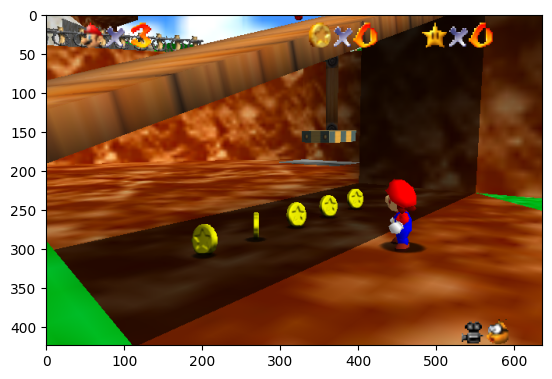

In [3]:
import cv2
import mss
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sct = mss.mss()

def grab_screen_shot():
        monitor = sct.monitors[1]
        sct_img = sct.grab(monitor)
        frame = cv2.cvtColor(np.asarray(sct_img, dtype=np.uint8), cv2.COLOR_RGB2BGR)
        # self.render_frame(frame)
        return frame[536:960, 962:962+636]

screen = grab_screen_shot()

plt.imshow(screen)

In [65]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

model.train(data="./YoloV8/data.yaml", 
            epochs=100, 
            imgsz=640, 
            batch=32,
            optimizer="AdamW",
            amp=True)

Ultralytics YOLOv8.0.121 🚀 Python-3.11.3 torch-2.1.0.dev20230424+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24265MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./YoloV8/data.yaml, epochs=100, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False,

In [31]:
model = YOLO('YoloV8/weights/best.pt')
preds = model.predict(screen[:,:,::-1])


for pred in preds[0].cpu().boxes.data.numpy():
    print(f"x1: {pred[0]} | y1: {pred[1]} | x2: {pred[2]} | y2: {pred[3]} | confidence: {pred[4]} | class: {pred[5]}")

    area = (pred[2] - pred[0]) * (pred[3] - pred[1])

    print(area)



0: 448x640 5 yellow_coins, 2.3ms
Speed: 1.6ms preprocess, 2.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


x1: 186.92100524902344 | y1: 268.19610595703125 | x2: 219.2838592529297 | y2: 309.0584411621094 | confidence: 0.8999000191688538 | class: 2.0
1322.4218
x1: 307.55535888671875 | y1: 239.84524536132812 | x2: 333.6358337402344 | y2: 271.8651123046875 | confidence: 0.8940578699111938 | class: 2.0
835.0933
x1: 350.262939453125 | y1: 230.96327209472656 | x2: 373.81646728515625 | y2: 258.8993835449219 | confidence: 0.8734521865844727 | class: 2.0
657.99396
x1: 385.1750793457031 | y1: 222.68150329589844 | x2: 406.7969055175781 | y2: 248.3450469970703 | confidence: 0.8710200190544128 | class: 2.0
554.8927
x1: 265.6313781738281 | y1: 252.3464813232422 | x2: 273.0519714355469 | y2: 286.0855712890625 | confidence: 0.7139580845832825 | class: 2.0
250.36406
